# Hyperparameter

In [69]:
import random
import pandas as pd
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

df = pd.read_csv('./data/banknotes.csv')

X = scale(df.drop('class', axis=1).values)
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)
print(X_train.shape)

def run(number_of_layers, size_of_layers, opt_name, lr, activ, init, batch):
    
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation=activ, kernel_initializer=init))
    for i in range(number_of_layers):
        model.add(Dense(size_of_layers, activation=activ, kernel_initializer=init))
    model.add(Dense(1, input_shape=(4,), activation=activ, kernel_initializer=init))

    model.compile(loss='binary_crossentropy',
                  optimizer=opt_name(lr=lr),
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=batch, epochs=10, verbose=0)
    result = model.evaluate(X_test, y_test)
    params = "Number of Layers:{} \
            Size of Layers:{} \
            Optimizer: {} \
            Learning Rate: {} \
            Activation Function: {} \
            Initializer: {} \
            Batch Size: {}".format(
        number_of_layers, size_of_layers, opt_name, lr, activ, init, batch
    )
    return h, result, params

(960, 4)


In [70]:
number_of_layers = [1,2,3,4]
size_of_layers = [1,2,3,4]
optimizers = [SGD, Adam, RMSprop, Adagrad]
learning_rates = [0.01, 0.05, 0.1, 0.5]
activation_functions = ['sigmoid', 'relu', 'tanh']
initializers = ['zeros', 'uniform', 'normal','he_normal', 'lecun_uniform', 'glorot_uniform']
batch_sizes = [8,16,32,64]

In [81]:
dflist = []
hyperparameters = []

for i in range(20):
    history, results, params = run(
        random.choice(number_of_layers),
        random.choice(size_of_layers),
        random.choice(optimizers),
        random.choice(learning_rates),
        random.choice(activation_functions),
        random.choice(initializers),
        random.choice(batch_sizes)
    )
    hyperparameters.append(params)
    dflist.append(pd.DataFrame(history.history, index=history.epoch))
historydf = pd.concat(dflist, axis=1)

metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([hyperparameters, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

412/412 [==============================] - 0s 64us/step


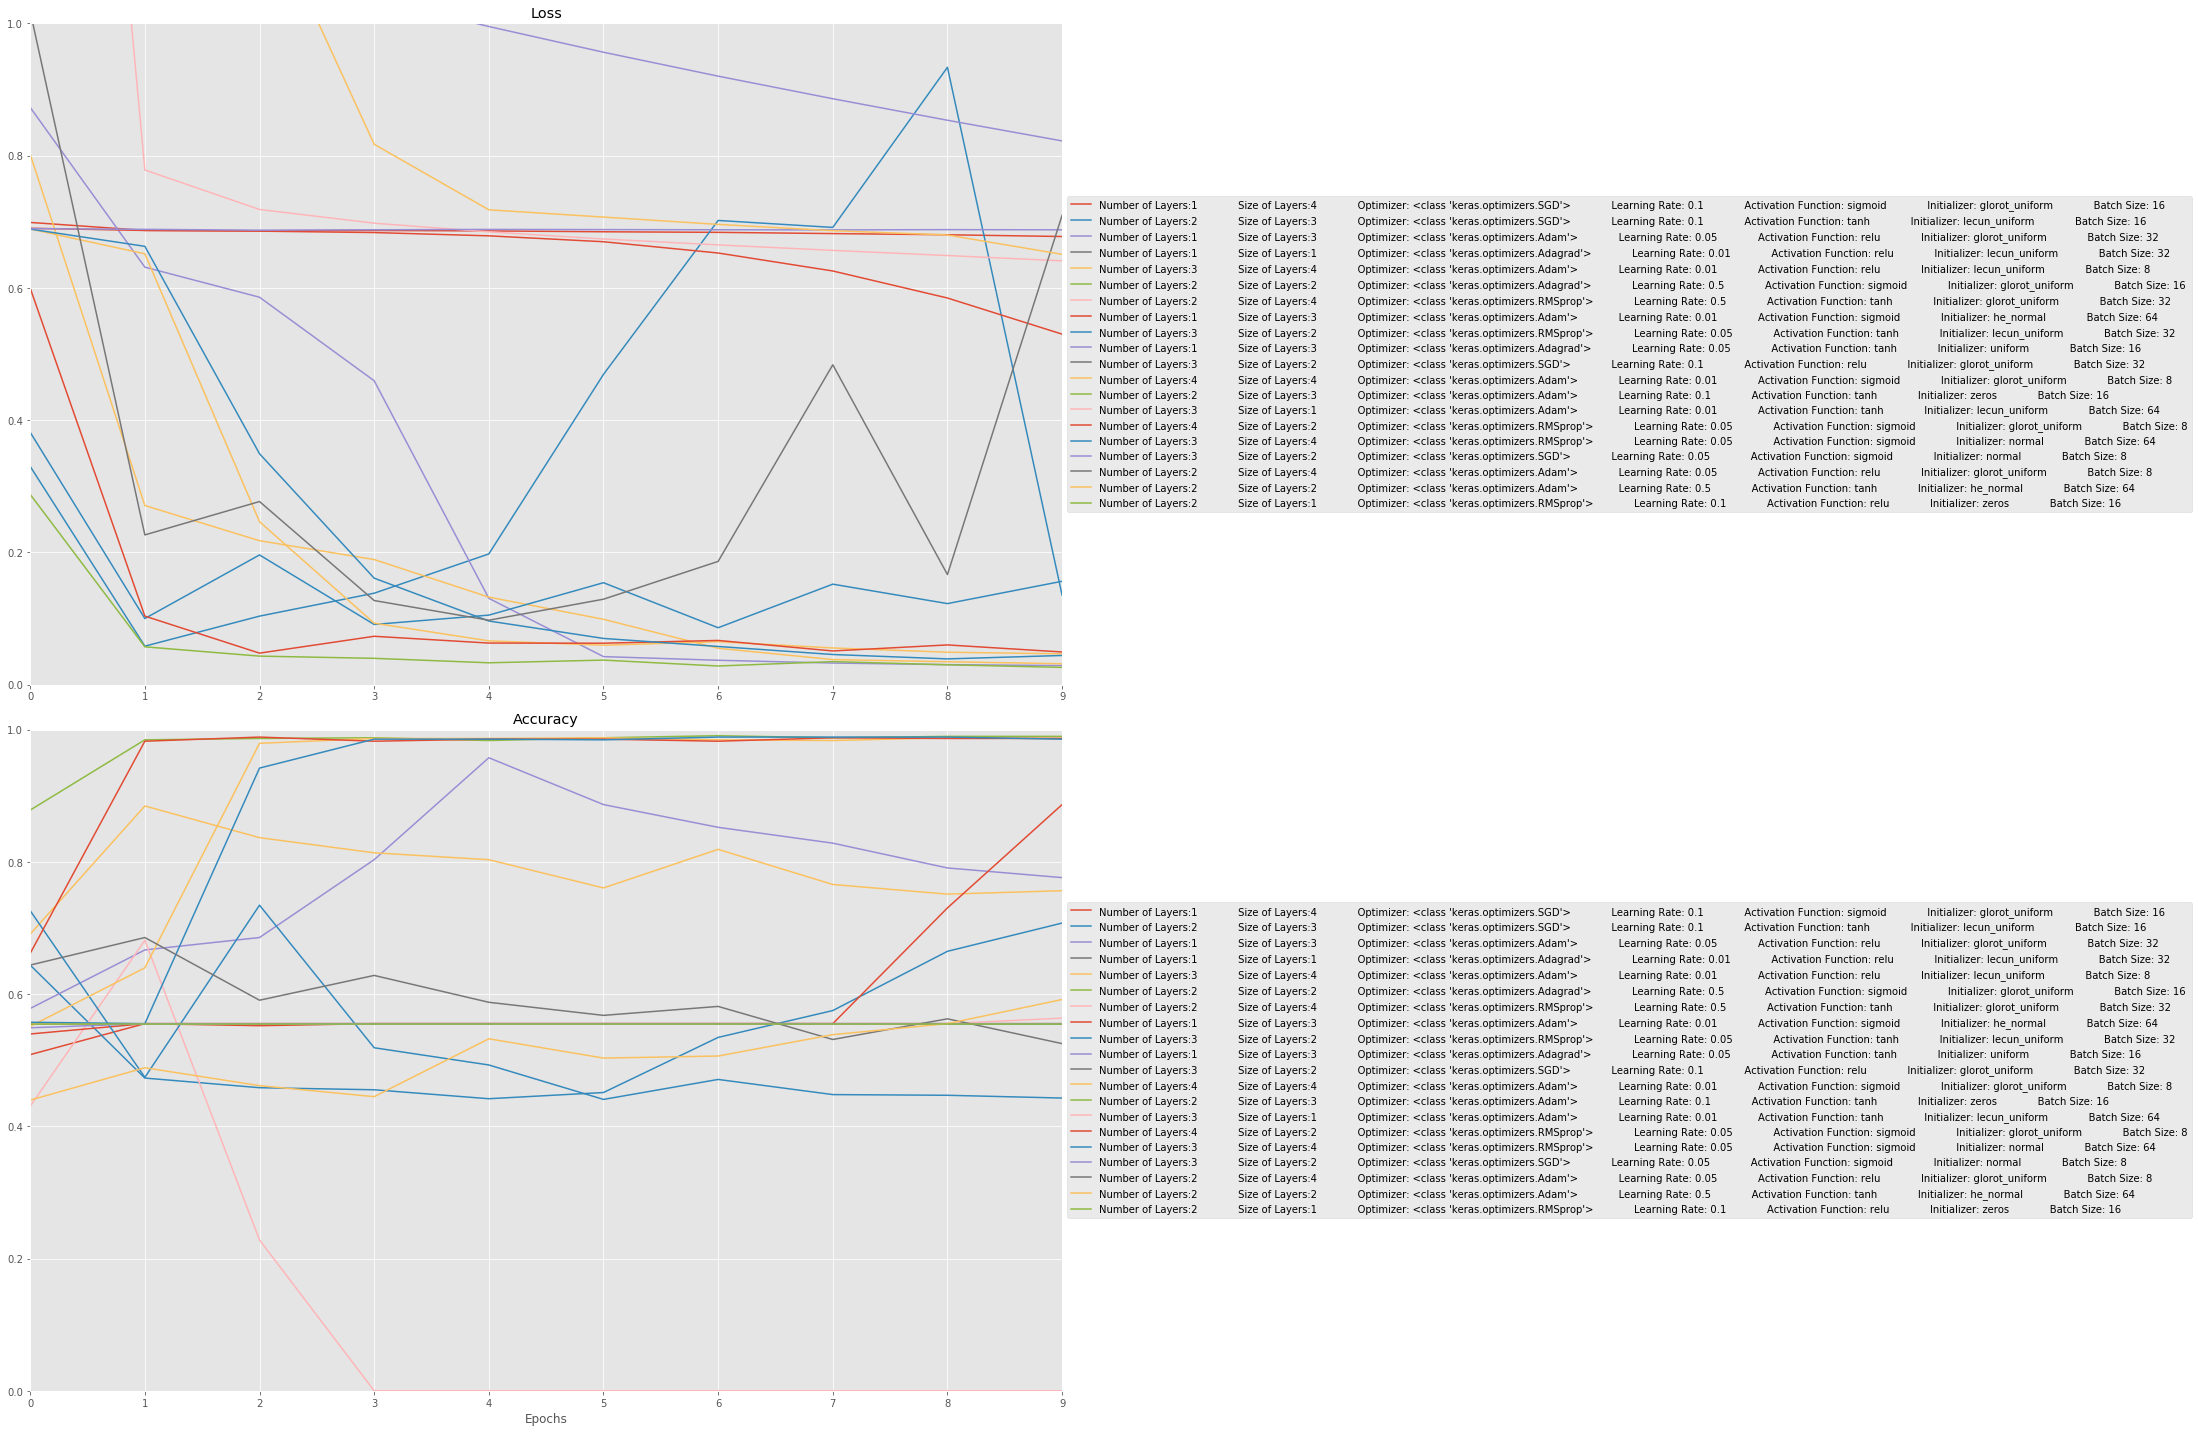

In [89]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax, figsize=(15,20)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax, figsize=(15,20)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()